<a href="https://colab.research.google.com/github/hcalldee/Penelitian_bidan_halimah/blob/main/Penelitian_Mba_Halimah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
# !pip install researchpy
import math
import pandas as pd
import numpy as np
import researchpy as rp
from scipy.stats import shapiro 
from scipy.stats import lognorm
from scipy.stats import kstest
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

In [120]:
url = 'https://raw.githubusercontent.com/hcalldee/Penelitian_bidan_halimah/main/dataset_mbahalimah.csv'
dataset = pd.read_csv(url,sep=',')
df = dataset.iloc[:,1:9]

In [121]:
# # pakai salah satu
# # normalisasi data logaritmik
# df['nilai pretest'] = np.log10(df['nilai pretest'])
# df['nilai Postest'] = np.log10(df['nilai Postest'])

# # normalisasi data squareroot
# df['nilai pretest'] = np.sqrt(df['nilai pretest'])
# df['nilai Postest'] = np.sqrt(df['nilai Postest'])

Q-Q plot nilai pretest 



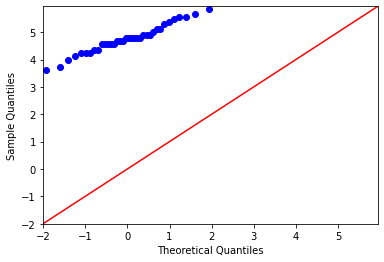



Q-Q plot nilai posttest 



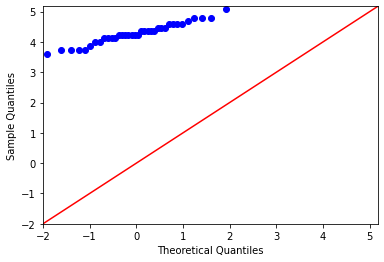



DESKRIPSI STATISTIK 

            UMUR         UK    PARITAS  nilai pretest  nilai Postest
count  36.000000  36.000000  36.000000      36.000000      36.000000
mean   28.250000  27.388889   1.805556       4.759649       4.287617
std     4.245165   5.426274   0.888641       0.519527       0.345927
min    22.000000  18.000000   1.000000       3.605551       3.605551
25%    25.750000  23.000000   1.000000       4.526657       4.123106
50%    27.500000  27.500000   2.000000       4.795832       4.242641
75%    31.000000  30.500000   2.000000       5.024755       4.499746
max    42.000000  38.000000   4.000000       5.830952       5.099020


Uji Normality Saphiro

nilai pretest terdistribusi Normal dengan nilai 0.6287355422973633

nilai Postest terdistribusi Normal dengan nilai 0.5212974548339844

Uji Normality Kolmogorov-Smirnov

nilai pretest tidak terdistribusi Normal dengan nilai 1.6903906930927444e-137

nilai Postest tidak terdistribusi Normal 1.6903906930927444e-137


Uji T-Test Pai

In [122]:
# frekuensi = pd.dataFrame()
frek = []
df.columns
n=0




print("Q-Q plot nilai pretest \n")
fig = sm.qqplot(df.iloc[:,6], line='45')
plt.show()
print('\n')

print("Q-Q plot nilai posttest \n")
fig = sm.qqplot(df.iloc[:,7], line='45')
plt.show()
print('\n')

print("DESKRIPSI STATISTIK \n")
print(df.describe())
print('\n')

print('Uji Normality Saphiro\n')
if(shapiro(df.iloc[:,6])[1]>0.05):
  print(str(df.columns[6])+' terdistribusi Normal dengan nilai '+str(shapiro(df.iloc[:,6])[1])+'\n')
elif(shapiro(df.iloc[:,6])[1]<0.05):
  print(str(df.columns[6])+' tidak terdistribusi Normal dengan nilai '+str(shapiro(df.iloc[:,6])[1])+'\n')

if(shapiro(df.iloc[:,7])[1]>0.05):
  print(str(df.columns[7])+' terdistribusi Normal dengan nilai '+str(shapiro(df.iloc[:,7])[1])+'\n')
elif(shapiro(df.iloc[:,7])[1]<0.05):
  print(str(df.columns[7])+' tidak terdistribusi Normal '+str(shapiro(df.iloc[:,7])[1])+'\n')

print('Uji Normality Kolmogorov-Smirnov\n')
if(kstest(df.iloc[:,6],'norm')[1]>0.05):
  print(str(df.columns[6])+' terdistribusi Normal dengan nilai '+str(kstest(df.iloc[:,6],'norm')[1])+'\n')
elif(kstest(df.iloc[:,6],'norm')[1]<0.05):
  print(str(df.columns[6])+' tidak terdistribusi Normal dengan nilai '+str(kstest(df.iloc[:,6],'norm')[1])+'\n')

if(kstest(df.iloc[:,7],'norm')[1]>0.05):
  print(str(df.columns[7])+' terdistribusi Normal dengan nilai '+str(kstest(df.iloc[:,7],'norm')[1])+'\n')
elif(kstest(df.iloc[:,7],'norm')[1]<0.05):
  print(str(df.columns[7])+' tidak terdistribusi Normal '+str(kstest(df.iloc[:,7],'norm')[1])+'\n')

print('\nUji T-Test Paired Variable\n')
hasil = stats.ttest_ind(a=df.iloc[:,6], b=df.iloc[:,7], equal_var=True)
if(hasil[0]==hasil[1]):
  print('population mean of hasil pretest is equal to hasil postest')
  print('pretest value : '+str(hasil[0])+' postest value : '+str(hasil[1]))
elif(hasil[0]!=hasil[1]):
  print('population mean of hasil pretest isn\'t equal to hasil postest')
  print('pretest value : '+str(hasil[0])+' postest value : '+str(hasil[1]))
print('\n')

print('Uji T-Test Independent Variable\n')
hasil = rp.ttest(group1= df.iloc[:,6], group1_name= "nilai pretest",
         group2= df.iloc[:,7], group2_name= "nilai postest")
print(hasil)
print('\n')

print("\nFREKUENSI\n")
for i in df.columns:
  if(i != "INISIAL "):
    frek.append(df[i].value_counts())

for dat in frek:
  print(pd.DataFrame(dat).T)
  print('\n')